converged SCF energy = -7.76736213574855


<Axes: >

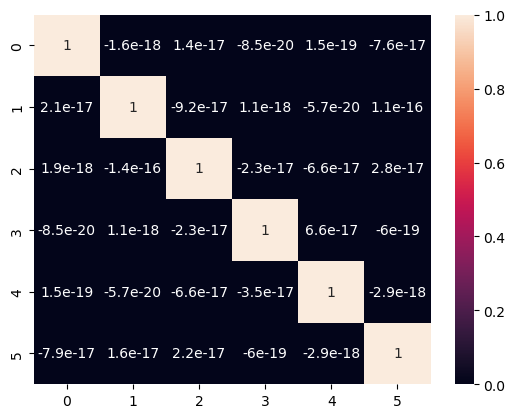

In [70]:
import numpy as np
from pyscf import gto, scf, lo
import pyscf
import seaborn as sns

mol = gto.M(
    atom='H 0 0 0 ; Li 0 0 1',
    basis='sto-3g'
)

hf = mol.RHF()
hf.scf()
S = hf.get_ovlp()
C = hf.mo_coeff # this defines the transformation from AOs to MOs

# S_MOs = np.einsum('ik,jl,kl->ij', C, C, S)
ovlp_s = np.einsum('ij,jl,lk->ik', C.T, S, C)
sns.heatmap(ovlp_s, annot=True)

<Axes: >

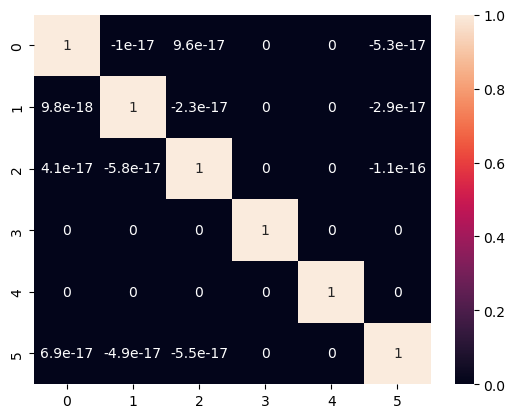

In [80]:
ca = lo.orth_ao(mol, 'meta_lowdin')
ovlp_a = np.einsum('ij,jl,lk->ik', ca.T, S, ca)
sns.heatmap(ovlp_a, annot=True)
# mo = np.linalg.solve(ca, hf.mo_coeff)


<Axes: >

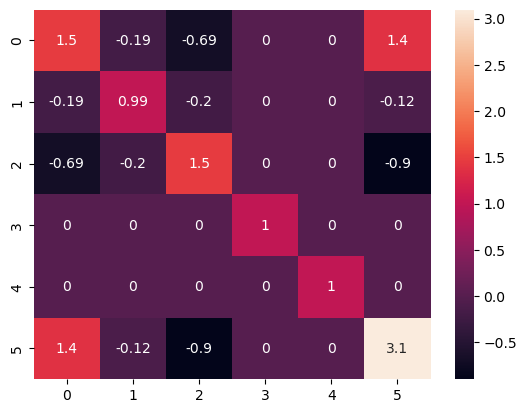

In [81]:
ca = lo.orth_ao(mol, 'meta_lowdin')
mat = np.einsum('ij,jl->il', ca.T, ca)
sns.heatmap(mat, annot=True)
# mo = np.linalg.solve(ca, hf.mo_coeff)


In [35]:
from functools import reduce
a = lo.orth.orth_ao(mol)
reduce(np.dot, (a.T, hf.get_ovlp(), a))

array([[ 1.00000000e+00, -2.71974900e-17,  1.49669060e-16,
         0.00000000e+00,  0.00000000e+00, -5.32759554e-17],
       [-3.76631226e-17,  1.00000000e+00, -1.08952110e-16,
         0.00000000e+00,  0.00000000e+00, -1.48164609e-17],
       [ 2.21492535e-17, -2.23631112e-17,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.06266076e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-4.81627475e-17, -4.41689064e-17,  2.48993289e-17,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

<Axes: >

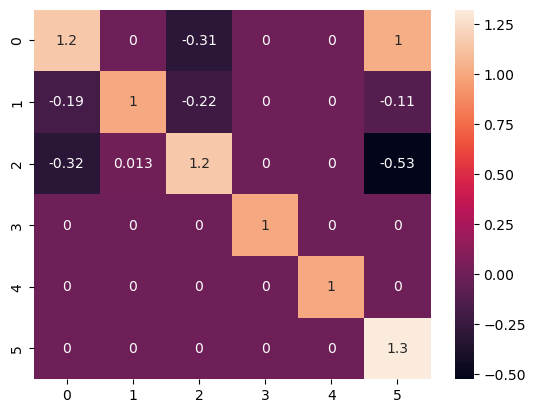

In [39]:
sns.heatmap(a, annot=True)

<Axes: >

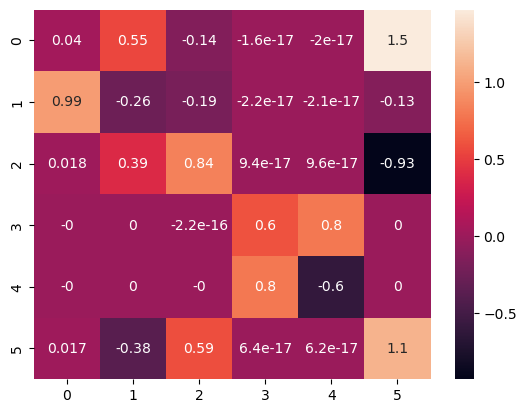

In [40]:
sns.heatmap(C, annot=True)

In [30]:
mo = np.linalg.solve(C, hf.mo_coeff)
mo

array([[ 9.04986532e-01, -2.33042072e-01, -6.32890505e-02,
        -2.04941108e-17, -8.95475238e-18,  7.00433229e-01],
       [ 2.99545589e-03,  5.52265185e-01, -1.59827333e-01,
        -2.30123894e-17, -2.21713385e-17,  1.47884816e+00],
       [ 6.31541768e-01,  3.34875433e-01,  3.40162851e-01,
         1.97212913e-16,  3.95380858e-17, -5.24814908e-01],
       [-3.46847982e-18, -6.14564246e-17, -2.62782304e-16,
         1.00000000e+00, -1.39264102e-16,  1.47822883e-16],
       [-1.32879302e-18, -7.50139856e-18, -1.95515978e-16,
         3.36367255e-34,  1.00000000e+00,  1.87927136e-17],
       [-6.50941309e-01,  3.08957404e-01,  8.70784111e-01,
         2.44916930e-16,  9.75202027e-17, -1.83573616e-01]])

In [31]:
hf.mo_coeff

array([[ 4.00395861e-02,  5.46147101e-01, -1.39247677e-01,
        -1.57772802e-17, -1.98519069e-17,  1.47241090e+00],
       [ 9.85307204e-01, -2.55706373e-01, -1.91866701e-01,
        -2.16513873e-17, -2.08548358e-17, -1.29627147e-01],
       [ 1.84864012e-02,  3.87975058e-01,  8.35681602e-01,
         9.40187217e-17,  9.58744039e-17, -9.27776802e-01],
       [-0.00000000e+00,  0.00000000e+00, -2.22044605e-16,
         6.03706194e-01,  7.97206893e-01,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         7.97206893e-01, -6.03706194e-01,  0.00000000e+00],
       [ 1.66252758e-02, -3.79135465e-01,  5.87901598e-01,
         6.43382155e-17,  6.23061042e-17,  1.12079023e+00]])

In [6]:
u, x, v=np.linalg.svd(S)

In [8]:
u-v.T

array([[-2.22044605e-16, -1.38777878e-16,  0.00000000e+00,
         2.12822328e-17,  5.41233725e-16,  4.44089210e-16],
       [ 1.66533454e-16, -1.11022302e-16,  0.00000000e+00,
         2.21349574e-16,  2.22044605e-16,  4.30211422e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.31736102e-16, -6.66133815e-16, -5.55111512e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.55111512e-17,  0.00000000e+00,  0.00000000e+00,
        -1.89251128e-16,  3.88578059e-16,  4.44089210e-16]])

In [10]:
mol.intor('int1e_ovlp')

array([[ 1.        ,  0.22938689,  0.53615069,  0.        ,  0.        ,
        -0.54759044],
       [ 0.22938689,  1.        ,  0.24113665,  0.        ,  0.        ,
         0.        ],
       [ 0.53615069,  0.24113665,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-0.54759044,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [11]:
S

array([[ 1.        ,  0.22938689,  0.53615069,  0.        ,  0.        ,
        -0.54759044],
       [ 0.22938689,  1.        ,  0.24113665,  0.        ,  0.        ,
         0.        ],
       [ 0.53615069,  0.24113665,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-0.54759044,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [14]:
import pyscf
pyscf.scf.addons.canonical_orth_(S)

array([[-1.48530586, -0.12681081,  0.        ,  0.        , -0.14540457,
        -0.49386903],
       [ 0.1312562 ,  0.85854247,  0.        ,  0.        ,  0.5291004 ,
        -0.23571481],
       [ 0.99430638, -0.64584471,  0.        ,  0.        ,  0.40631509,
        -0.37302466],
       [ 0.        ,  0.        ,  0.        , -1.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.05755398, -0.322561  ,  0.        ,  0.        ,  0.6519002 ,
         0.31365466]])

In [16]:
dir(pyscf)

['DEBUG',
 'M',
 'PYSCF_EXT_PATH',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'ao2mo',
 'data',
 'gto',
 'lib',
 'numpy',
 'scf',
 'symm']

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.45062928e-34,  4.66143447e-17],
       [-4.16803600e-18,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.09914713e-33, -2.86436783e-16],
       [-1.65864629e-18,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  2.89041272e-32,  4.76464047e-16],
       [-2.22341044e-34,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -1.39264102e-16,  5.95300269e-32],
       [-2.93606086e-34,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  7.86106689e-32],
       [-3.27354921e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.42291314e-33,  1.00000000e+00]])

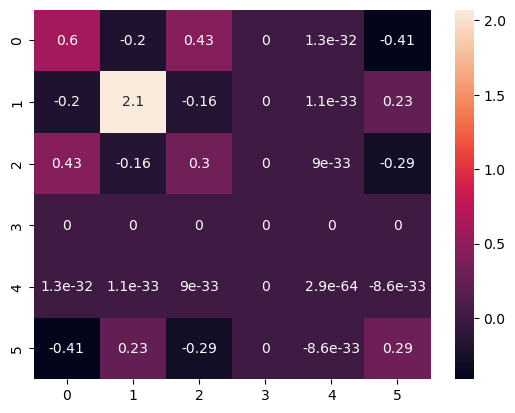

In [67]:
dm0 = hf.make_rdm1(hf.mo_coeff, hf.mo_occ)
mo = np.linalg.solve(hf.mo_coeff, hf.mo_coeff)
occ = np.einsum('ij,jl,lk->ik', mo.T, dm0, mo)
sns.heatmap(occ, annot=True)
mo

array([[ 1.42766693e+00, -1.21811541e+00, -2.98826842e-01,
        -3.46650049e-17, -3.25955935e-17, -1.52109229e-01],
       [-6.89708453e-01,  8.60879579e-01,  1.59896604e-01,
         1.87723908e-17,  1.74153985e-17,  8.99764248e-02],
       [ 4.76399363e-01,  5.96638581e-01, -4.25174179e-02,
        -4.10804712e-18, -4.73306937e-18,  9.97368077e-03],
       [ 3.15039665e-17, -1.11476784e-16, -1.14179285e-17,
        -1.39402383e-33, -1.23741113e-33, -8.47828266e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.26656188e-01,  3.79249609e-02,  1.02841036e-01,
         1.15218191e-17,  1.12649586e-17,  3.66917456e-02]])

In [60]:
mo

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.45062928e-34,  4.66143447e-17],
       [-4.16803600e-18,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.09914713e-33, -2.86436783e-16],
       [-1.65864629e-18,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  2.89041272e-32,  4.76464047e-16],
       [-2.22341044e-34,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -1.39264102e-16,  5.95300269e-32],
       [-2.93606086e-34,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  7.86106689e-32],
       [-3.27354921e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.42291314e-33,  1.00000000e+00]])

<Axes: >

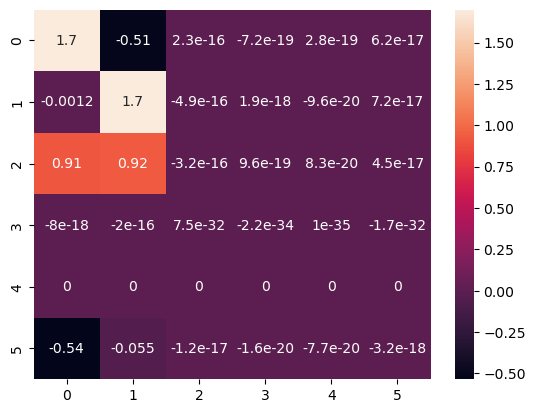

In [61]:
C = lo.orth_ao(mol, 'meta_lowdin')
mo = np.linalg.solve(C, hf.mo_coeff)
dm1 = hf.make_rdm1(mo, hf.mo_occ)
occ = np.einsum('ij,jl,lk->ik', mo, dm1, mo)
sns.heatmap(occ, annot=True)

<Axes: >

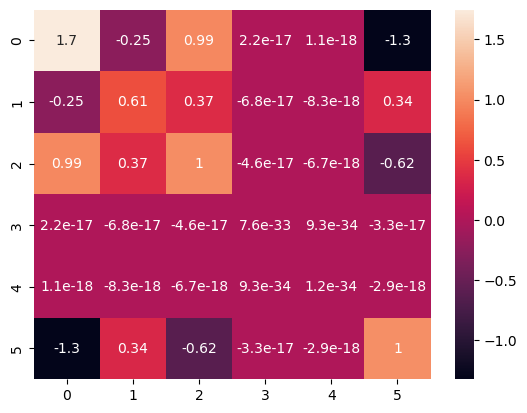

In [50]:
sns.heatmap(hf.make_rdm1(mo, hf.mo_occ), annot=True)

In [52]:
hf.mulliken_pop(mol, dm, np.eye(mol.nao_nr()))

 ** Mulliken pop  **
pop of  0 H 1s            1.74662
pop of  1 Li 1s           0.61001
pop of  1 Li 2s           1.02197
pop of  1 Li 2px          0.00000
pop of  1 Li 2py          0.00000
pop of  1 Li 2pz          1.03836
 ** Mulliken atomic charges  **
charge of    0H =     -0.74662
charge of    1Li =      0.32966


(array([1.74661846e+00, 6.10011616e-01, 1.02197312e+00, 7.57784496e-33,
        1.16073342e-34, 1.03835853e+00]),
 array([-0.74661846,  0.32965673]))

In [82]:
hf.mo_occ

array([2., 2., 0., 0., 0., 0.])

In [92]:
c = hf.mo_coeff[:, hf.mo_occ==2]

In [96]:
o = np.einsum('ij, jk, kl-> il', c.conj().T, hf.get_ovlp(), c)

In [97]:
hf.get_ovlp().shape

(6, 6)

In [98]:
c.shape

(6, 2)

In [99]:
np.linalg.svd(o)

(array([[-1.00000000e+00, -2.14323421e-17],
        [-2.14323421e-17,  1.00000000e+00]]),
 array([1., 1.]),
 array([[-1., -0.],
        [ 0.,  1.]]))